In [15]:
import numpy as np
import matplotlib.pyplot as plt
import kplr

In [16]:
from astropy.coordinates import SkyCoord
import astropy.units as u

from astroquery.simbad import Simbad
customSimbad = Simbad()
customSimbad.add_votable_fields('ra')
customSimbad.add_votable_fields('dec')

from astroquery.vizier import Vizier

In [17]:
kic = 11189127

client = kplr.API()
star = client.star(kic)

lcs = star.get_light_curves(short_cadence=False)



In [18]:
time, flux, ferr, qual = [], [], [], []
for lc in lcs:
    with lc.open() as f:
        hdu_data = f[1].data
        time.append(hdu_data["time"])
        flux.append(hdu_data["pdcsap_flux"])
        ferr.append(hdu_data["pdcsap_flux_err"])
        qual.append(hdu_data["sap_quality"])

tout = np.array([])
fout = np.array([])
eout = np.array([])
for i in range(len(flux)):
    t = time[i][qual[i] == 0]
    f = flux[i][qual[i] == 0]
    e = ferr[i][qual[i] == 0]

    t = t[np.isfinite(f)]
    e = e[np.isfinite(f)]
    f = f[np.isfinite(f)]

    e /= np.median(f)
    f /= np.median(f)
    tout = np.append(tout, t)
    fout = np.append(fout, f)
    eout = np.append(eout, e)

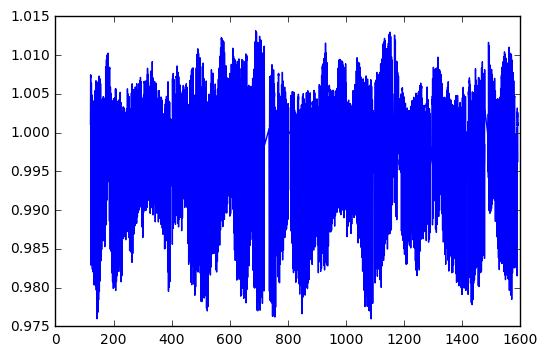

In [19]:
plt.plot(tout, fout)

In [20]:
if len(star.kois) > 0:
    for i in range(len(star.kois)):

        period = star.kois[i].koi_period
        phase = star.kois[i].koi_time0 - 2454833
        duration = star.kois[i].koi_duration/24.0
    
        shift = np.mod(tout-phase+duration/2.0,period)-duration

        tout = tout[shift > 0]
        fout = fout[shift > 0]
        eout = eout[shift > 0]

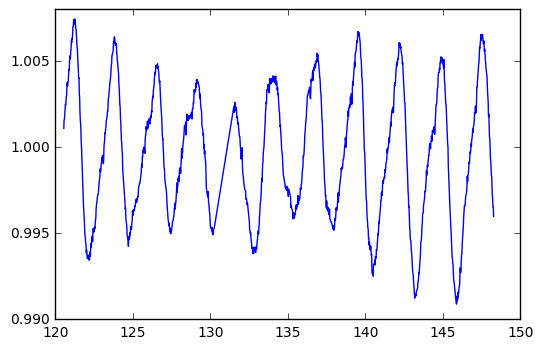

In [22]:
plt.plot(tout[0:1200], fout[0:1200])
gap = 0.01
tint = np.arange(tout[0], tout[-1], gap)
fint = np.interp(tint, tout, fout)

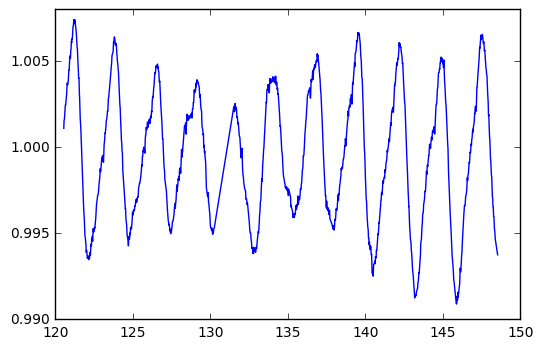

In [26]:
plt.plot(tint[0:2800], fint[0:2800])

In [27]:
fint -= np.mean(fint)
n = len(tint)
r = np.correlate(fint, fint, mode = 'full')[-n:]

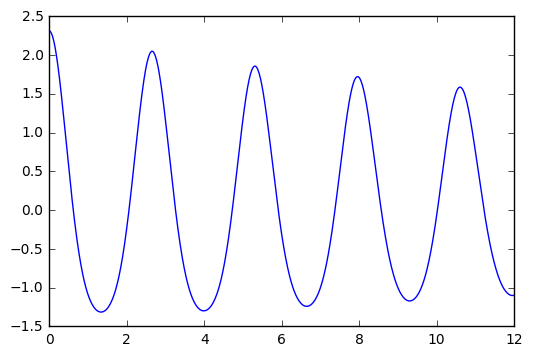

In [29]:
plt.plot(gap*np.arange(len(r))[0:1200], r[0:1200])

In [30]:
firstmin = np.where(np.diff(r) > 0)[0][0]
peak = firstmin + np.where(r[firstmin:] == np.max(r[firstmin:]))[0][0]
period = peak*gap
print(period)

2.65


In [31]:
source = kic
client = kplr.API()
targ = client.target(source)

BV = targ.BV_UBV + targ.E_BV

TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

In [32]:
a = 0.40
n = 0.55
c = 0.45
b = 0.31




factor = a*(BV - c)**b

A = (period/factor)**(1./n) 

print(A)


77.75525174673284
